In [76]:
#把需要的 library import 進來
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [77]:
#顯示圖形的函數，可不先不用理解，直接用
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [78]:
# 把兩個訓練資料集和測試資料集讀進來
train = pd.read_csv('Titanic_train.csv')
test = pd.read_csv('Titanic_test.csv')

方法一
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

方法二
3倍標準差範圍為-116.88到181.28
異常值有
263.0
263.0
247.5208
512.3292
247.5208
262.375
263.0
211.5
227.525
263.0
221.7792
227.525
512.3292
211.3375
227.525
227.525
211.3375
512.3292
262.375
211.3375
共20個

方法三


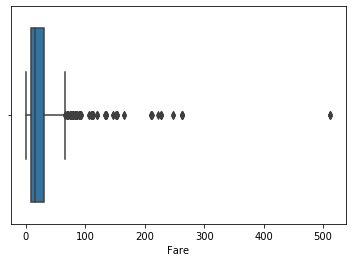

In [135]:
#探索性分析: 觀察-是否有異常值，我們來觀察一下 Fare 變數吧!!
fare = train['Fare']
#Q1:觀察票價是否有異常值的現象?

#方法1 
print('方法一')
#進行一個描述性的統計（規定範圍），從而檢視哪些值是不合理的（範圍以外的值）。
print(fare.describe())
#maximum為不合理的值，平均僅有32，std也只有50，maximum卻是512

#方法2
print('\n方法二')
#進行3倍標準差原則的計算，從而檢視哪些值是可疑的異常值。
print('3倍標準差範圍為%.2f到%.2f'%(fare.mean()-3*fare.std(),fare.mean()+3*fare.std()))
print('異常值有')
a=0
for i in fare:
    if i > fare.mean()+3*fare.std() or i < fare.mean()-3*fare.std():
        a+=1
        print(i)
print('共%s個'%a)


#方法3 
print('\n方法三')
#盒鬚圖判別法(IQR method)
sns.boxplot(fare)
#可以發現有特定一點（一個人的票價）在約莫500的地方

In [158]:
#Q2:你覺得找出的異常是真的異常? 你覺得需要做處理嗎?

#首先找出異常值的資料
l = []
for i in range(len(train)):
    if train['Fare'][i] > fare.mean()+3*fare.std():
        l.append(train.iloc[i])
abnormal = pd.DataFrame(l)
print(abnormal)
#可以發現異常值的Pclass皆為1，表示高價的票都是來自於頭等艙

#若將頭等艙的票價加以計算（此處用三倍標準差）
print('\n異常值 of first class')
first = []
for k in range(len(train)):
    if train['Pclass'][k] == 1:
        first.append(train['Fare'][k])

first = pd.Series(first)
for j in first:
    if j > first.mean()+3*first.std() or j < first.mean()-3*first.std():
        print(j)
#僅剩下512.3292為異常值

#故在計算時除了512.3292外，其他仍屬頭等艙票價的合理範圍內，因此不需處理
#但512.3292需要做處理

     PassengerId  Survived  Pclass  \
27            28         0       1   
88            89         1       1   
118          119         0       1   
258          259         1       1   
299          300         1       1   
311          312         1       1   
341          342         1       1   
377          378         0       1   
380          381         1       1   
438          439         0       1   
527          528         0       1   
557          558         0       1   
679          680         1       1   
689          690         1       1   
700          701         1       1   
716          717         1       1   
730          731         1       1   
737          738         1       1   
742          743         1       1   
779          780         1       1   

                                                  Name     Sex   Age  SibSp  \
27                      Fortune, Mr. Charles Alexander    male  19.0      3   
88                          Fortune, Miss. 